<a href="https://colab.research.google.com/github/jiwonlee-0218/colab/blob/main/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network

## 1. data 업로드

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()

------

## 2. data 확인

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9 == Ankle boot


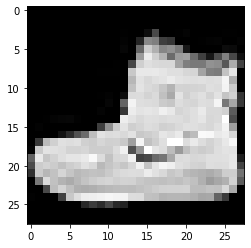

In [ ]:
index = 0 # index 설정에 따라 원하는 data를 골라서 그릴 수 있고 / 0~59999까지 대입 가능합니다.
print(str(y[index]) + ' == ' + str(class_names[y[index]]))
img = x[index]
plt.imshow(img, cmap='gray')

--------

## 3. data preprocess

#### 무엇을 해야할까요?

1) 형 변환

2) normalize

3) one-hot encoding

4) flatten(X) reshape(O)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# 1) 형 변환

x = x.astype('float32') # 32비트 실수형 / np.ndarray.astype은 numpy에 검색하면 형 변환 해주는 함수
x_test = x_test.astype('float32')

# 2) normalize

x, x_test = x/255., x_test/255.

# 3) one-hot encoding      해당 label만 1인 한줄짜리 벡터

y = to_categorical(y, 10)
y_test = to_categorical(y_test,10)

#### 하지만 중요 point가 있습니다.

#### <font color="blue"> Dense layer는 dimension이 몇인 ndarray를 받을까요?

#### <font color="red"> 2D array

why??

vector(1D array)를 받지만 이 1d array vercor의 data갯수가 존재하는데 data 개수를 별도로 받는게 아니라 data갯수가 vectorization된 형태를 받기 때문입니다.)

즉, shape (m, n_x) 형태를 받습니다. (기존 course 1에서 배운 것과 다르게 m을 맨 앞으로 빼줍니다./ 이유가 있습니다.)

결론: 우리가 생각하는 shape에서 맨 앞에 data 개수로 dimension을 추가한 형태를 받습니다. 

#### <font color="blue"> Convolution layer는 dimension이 몇인 ndarray를 받을까요?

#### <font color="red"> 4D array (3d array 모음)

(세로 픽셀, 가로 픽셀, channel)을 input으로 넣어왔으니

이에 dimension을 하나 추가한 4D array를 받습니다.

In [ ]:
## x의 shape 확인

x.shape

(60000, 28, 28)

In [ ]:
# 4) reshape

x = x.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# 아래 코드로도 dimension을 추가하는 것이 가능합니다.

'''
x = np.expand_dims(x, axis=3)     expand_dims()는 차원확장함수
x_test = np.expand_dims(x_test, axis=3)
'''

'\nx = np.expand_dims(x, axis=3)\nx_test = np.expand_dims(x_test, axis=3)\n'

In [ ]:
## x의 shape 다시 확인

x.shape

(60000, 28, 28, 1)

----------

## 4. 모델 만들기

### 1) 똑같은 layer

길게 쓰기 귀찮아서 짧은 버전이 있으니 편한 것으로 쓰시면 됩니다.

'Conv2D' == 'Convolution2D' / 
'MaxPool2D' == 'MaxPooling2D'

### 2) CNN도 규칙이 있습니다.

(Conv(Maxpool) -> Flatten -> Dense 흐름으로 갑니다.)

1> input_shape 맞춰주기 (3D shape이 들어가야하며, 현재는 흑백이미지여서 channel을 1로 설정)

2> output layer의 unit 개수

3> output laeyer의 activation function

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
def create_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model = create_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## 5. 학습

이전 Dense layer 학습과 차이점을 관찰하시기 바랍니다.

In [ ]:
history = model.fit(x, y, epochs=5, validation_split=1/6)

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7224 - accuracy: 0.7352 - val_loss: 0.3702 - val_accuracy: 0.8652
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.3503 - accuracy: 0.8727 - val_loss: 0.3125 - val_accuracy: 0.8868
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.2952 - accuracy: 0.8920 - val_loss: 0.2930 - val_accuracy: 0.8944
Epoch 4/5
1563/1563 [==============================] - 37s 24ms/step - loss: 0.2575 - accuracy: 0.9046 - val_loss: 0.2921 - val_accuracy: 0.8923
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2304 - accuracy: 0.9137 - val_loss: 0.2720 - val_accuracy: 0.9020


### 1) 시간이 오래걸린다. -> but 성능보장

인접 정보만 연산하면 시간이 줄어야하는 것 아닌가?

parameter 자체는 줄었을 수도 있지만 그 filter 즉 하나의 kernel로 여러번 연산을 하니 연산량 자체가 많아집니다.

### 2) Dense layer epoch 5회 돌리면 0.85 수준인데 CNN은 0.9 정도 나옵니다. accuracy

### 3) batch_size 늘리면 메모리가 터지는 error가 납니다.

In [ ]:
# local로 돌리지 마세요.

history = model.fit(x, y, epochs=5, validation_split=1/6, batch_size = 50000) # 50000으로 설정하면 무조건 error 납니다. 즉 전부다 데이터를 한꺼번에 메모리에 넣으려고 하면 에러발생

-------